# Title : Content Trends Analysis for Strategic Recommendations

Problem Statement:
Netflix has become one of the most prominent global streaming platforms, continuously expanding its library with a mix of original productions and licensed content. However, with growing competition from platforms like Amazon Prime, Disney+, and regional OTT providers, Netflix must strategically analyze its content catalog to identify strengths, gaps, and opportunities.
The specific problem to be addressed in this project is 'Content Trends Analysis for Strategic Recommendations'. The aim is to uncover how Netflix’s content distribution (Movies vs. TV Shows, genres, and country contributions) has evolved over the years. This will enable the identification of key genres, audience preferences, and strategic insights into global content expansion.

Objectives:
- Analyze the distribution of Movies vs. TV Shows over the years.
- Identify the most common genres and how their popularity has changed.
- Compare country-wise contributions to Netflix’s catalog.



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Import Data
df = pd.read_csv('/content/Netflix Dataset.csv')
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [6]:
df.shape

(7789, 11)

In [7]:
df.isnull().sum().sum()

np.int64(3630)

In [8]:
df.duplicated().sum()

np.int64(2)

In [9]:
df[df.duplicated()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
6300,s684,Movie,Backfire,Dave Patten,"Black Deniro, Byron ""Squally"" Vinson, Dominic ...",United States,"April 5, 2019",TV-MA,97 min,"Dramas, Independent Movies, Thrillers",When two would-be robbers accidentally kill a ...
6622,s6621,Movie,The Lost Okoroshi,Abba T. Makama,"Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...",Nigeria,"September 4, 2020",TV-MA,94 min,"Comedies, Dramas, Independent Movies",A disillusioned security guard transforms into...


Note: Netflix Dataset
- Dataset consists of 7789 rows and 11 columns, with each column type as object.
- Contains several null or missing values, approx 3630
- Contains 2 duplicated rows.

# Data Cleaning

In [10]:
# Remove duplicated rows
df.drop_duplicates(inplace=True)

In [11]:
df[df.duplicated()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description


In [12]:
df.columns

Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')

In [13]:
df['Category'].value_counts()

,count
Category,
Movie,5377
TV Show,2410


In [14]:
df.isnull().sum()

,0
Show_Id,0
Category,0
Title,0
Director,2388
Cast,718
Country,507
Release_Date,10
Rating,7
Duration,0
Type,0


In [15]:
# Handle missing values
df['Director'].fillna('Unknown' , inplace= True)
df['Cast'].fillna('Unknown' , inplace=True)
df['Country'].fillna('Unknown' , inplace=True)

/tmp/ipython-input-812439844.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Director'].fillna('Unknown' , inplace= True)
/tmp/ipython-input-812439844.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [16]:
df['Rating'].fillna(df['Rating'].mode()[0] , inplace=True)

/tmp/ipython-input-2836036684.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rating'].fillna(df['Rating'].mode()[0] , inplace=True)


In [17]:
df.dropna(inplace=True)

In [18]:
df.isnull().sum()

,0
Show_Id,0
Category,0
Title,0
Director,0
Cast,0
Country,0
Release_Date,0
Rating,0
Duration,0
Type,0


In [19]:
df['Release_Date'] = df['Release_Date'].astype('datetime64[ns]')
df['Release_Year'] = df['Release_Date'].dt.year.astype('int64')

In [20]:
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Release_Year
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020


In [21]:
# Separate 'Duration' into 'Duration_min' and 'Seasons' for 'movie' and 'TV show' type respectfully.
df['Duration_min'] = df['Duration'].apply(lambda x: int(x.split(' ')[0]) if 'min' in x else 0)
df['Seasons'] = df['Duration'].apply(lambda x: int(x.split(' ')[0]) if 'Season' in x else 0)

# Display the first few rows with the new columns
display(df[['Duration', 'Duration_min', 'Seasons']].head())

,Duration,Duration_min,Seasons
0,4 Seasons,0,4
1,93 min,93,0
2,78 min,78,0
3,80 min,80,0
4,123 min,123,0


In [22]:
df['Country'].value_counts()

,count
Country,
United States,2549
India,923
Unknown,506
United Kingdom,396
Japan,225
...,...
"Peru, United States, United Kingdom",1
"Saudi Arabia, United Arab Emirates",1
"United Kingdom, France, United States, Belgium",1


In [23]:
# Extract Primary Country(First listed)
df['Country'] = df['Country'].str.split(',').str[0]
df['Country'].unique()

array(['Brazil', 'Mexico', 'Singapore', 'United States', 'Turkey',
       'Egypt', 'India', 'Poland', 'Thailand', 'Nigeria', 'Unknown',
       'Norway', 'United Kingdom', 'Japan', 'South Korea', 'Italy',
       'Canada', 'Indonesia', 'Romania', 'Spain', 'Iceland',
       'South Africa', 'France', 'Portugal', 'Hong Kong', 'Argentina',
       'Germany', 'Denmark', 'Kenya', 'New Zealand', 'Pakistan',
       'Australia', 'China', 'Taiwan', 'Netherlands', 'Philippines',
       'United Arab Emirates', 'Iran', 'Israel', 'Uruguay', 'Bulgaria',
       'Mauritius', 'Lebanon', 'Colombia', 'Soviet Union', 'Sweden',
       'Malaysia', 'Ireland', 'Serbia', 'Finland', 'Peru', 'Chile',
       'Ghana', 'Saudi Arabia', 'Namibia', 'Russia', 'Belgium', 'Vietnam',
       'Kuwait', 'Czech Republic', 'Zimbabwe', 'Hungary', 'Venezuela',
       'Cambodia', 'Austria', 'West Germany', 'Slovenia', 'Switzerland',
       'Jordan', 'Bangladesh', 'Georgia', 'Puerto Rico', 'Senegal',
       'Guatemala', 'Ukraine', 'Ja

In [26]:
# Extract Primary Type(First listed)
df['Type'] = df['Type'].str.split(',').str[0]
df['Type'].value_counts()

,count
Type,
Dramas,1384
Comedies,1074
Documentaries,751
Action & Adventure,721
International TV Shows,689
Children & Family Movies,502
Crime TV Shows,369
Kids' TV,357
Stand-Up Comedy,321


In [27]:
# drop unnecessary columns
df.drop(['Duration' , 'Description'] , axis=1 , inplace=True)

In [28]:
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Type,Release_Year,Duration_min,Seasons
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,International TV Shows,2020,0,4
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,Dramas,2016,93,0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,Horror Movies,2018,78,0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,Action & Adventure,2017,80,0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,Dramas,2020,123,0


In [29]:
# Save cleaned dataset
df.to_csv('Netflix_cleaned.csv' , index=False)

# Data Analysis

Questions:

1. Analyze the distribution of Movies vs. TV Shows over the years.

2. Identify the most common genres and how their popularity has changed.

3. Compare country-wise contributions to Netflix’s catalog

## The distribution of Movies vs. TV Shows over the years.

In [48]:
category_trend = df.groupby(['Release_Year'])['Category'].value_counts()
category_trend = category_trend.reset_index(name='count')
category_trend

,Release_Year,Category,count
0,2008,Movie,1
1,2008,TV Show,1
2,2009,Movie,2
3,2010,Movie,1
4,2011,Movie,13
5,2012,Movie,3
6,2013,Movie,6
7,2013,TV Show,5
8,2014,Movie,19
9,2014,TV Show,6


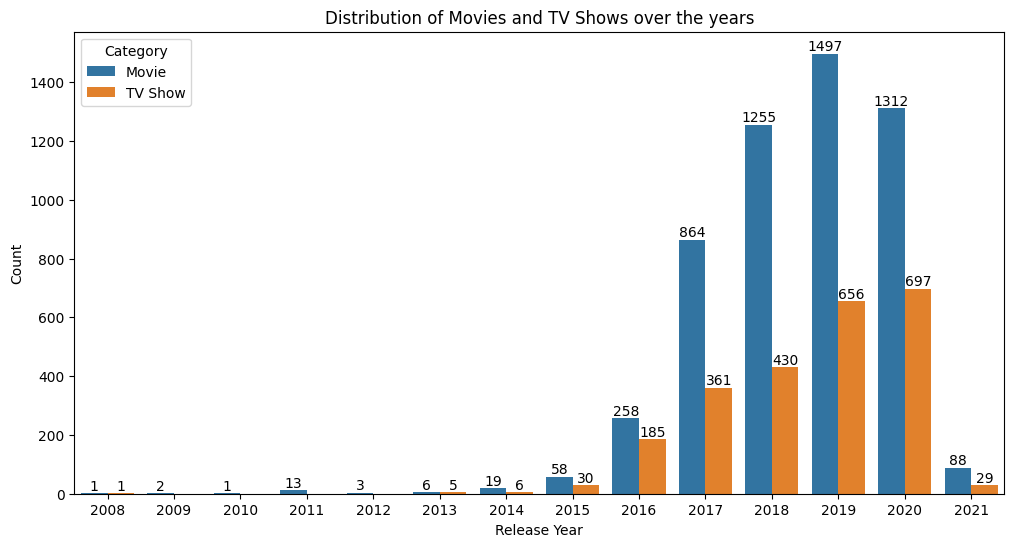

In [85]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=category_trend , x="Release_Year" , y='count' , hue='Category')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Distribution of Movies and TV Shows over the years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.savefig('distribution_movies_tv_over_years.png')
plt.show()

Note:
In Recent Years, Netflix more focused on Movies and less focused on TV Shows.

## Identify the most common genres and how their popularity has changed

/tmp/ipython-input-533221504.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




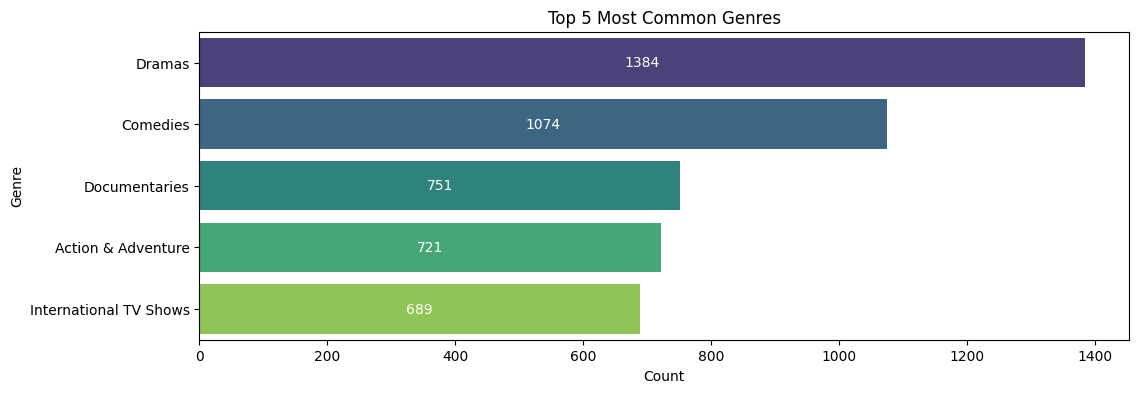

In [83]:
# Get the counts of each genre
genre_counts = df['Type'].value_counts()

# Filter for genres , Top 5 genres that are most common on Netflix
most_common_genres = genre_counts.head(5)

# Plot the most common genres
plt.figure(figsize=(12,4))
ax = sns.barplot(x=most_common_genres.values, y=most_common_genres.index, orient="h", palette="viridis")
for container in ax.containers:
    ax.bar_label(container , label_type='center' , color='white')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Top 5 Most Common Genres')
plt.savefig('most_common_genres_filtered.png')
plt.show()

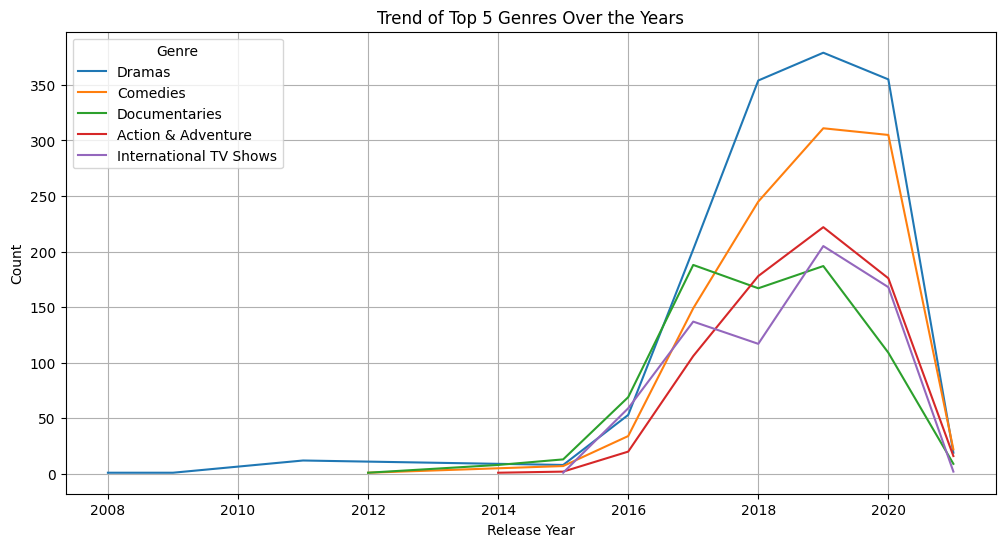

In [69]:
# Get the top 5 most common genres
top_genres = df['Type'].value_counts().head(5).index

# Filter the DataFrame to include only the top 5 genres
df_top_genres = df[df['Type'].isin(top_genres)]

# Group by Release_Year and Type to count occurrences
genre_trend = df_top_genres.groupby(['Release_Year', 'Type']).size().reset_index(name='count')

# Plot the genre trend over the years for the top 5 genres
plt.figure(figsize=(12, 6))
sns.lineplot(data=genre_trend, x='Release_Year', y='count', hue='Type')
plt.title('Trend of Top 5 Genres Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.legend(title='Genre')
plt.grid(True)
plt.savefig('genre_trend_over_years.png')
plt.show()

Note: Dramas seems to be the most common genre on Netflix. Dramas seems to be highly popular in 2019 year.

## Compare country-wise contributions to Netflix’s catalog

In [72]:
df.groupby(['Release_Year', 'Country']).size().reset_index(name='Count')

,Release_Year,Country,Count
0,2008,United States,2
1,2009,Denmark,1
2,2009,United States,1
3,2010,United States,1
4,2011,Spain,1
...,...,...,...
314,2021,Spain,1
315,2021,Turkey,1
316,2021,United Kingdom,6
317,2021,United States,64


In [75]:
import plotly.express as px

# Count the number of titles per country and year
country_year_counts = df.groupby(['Release_Year', 'Country']).size().reset_index(name='Count')

# Filter out 'Unknown' country
country_year_counts = country_year_counts[country_year_counts['Country'] != 'Unknown']

# Create a choropleth map with animation
fig = px.choropleth(country_year_counts,
                    locations="Country",
                    locationmode='country names',
                    color="Count",
                    hover_name="Country",
                    animation_frame="Release_Year",
                    color_continuous_scale="Plasma",
                    title='Content Distribution by Country Over the Years')
fig.update_layout(
    title_text='Content Distribution by Country Over the Years',
    geo_scope='world',
)
fig.show()

## Analyze and visualize the most frequent directors and cast members in the dataset.

In [77]:
def count_names(df, column_name):
    """Counts the occurrences of individual names in a specified column."""
    # Filter out 'Unknown' values
    filtered_df = df[df[column_name] != 'Unknown'].copy()

    # Split the strings and flatten the list
    names = filtered_df[column_name].str.split(',').explode()

    # Strip whitespace from names
    names = names.str.strip()

    # Count the occurrences of each name
    name_counts = names.value_counts()

    return name_counts

# Get the counts for directors and cast
director_counts = count_names(df, 'Director')
cast_counts = count_names(df, 'Cast')

# Display the top 10 directors and cast members
print("Top 10 Directors:")
display(director_counts.head(10))

print("\nTop 10 Cast Members:")
display(cast_counts.head(10))

Top 10 Directors:


,count
Director,
Jan Suter,21
Raúl Campos,19
Marcus Raboy,16
Jay Karas,15
Cathy Garcia-Molina,13
Youssef Chahine,12
Jay Chapman,12
Martin Scorsese,12
Steven Spielberg,10



Top 10 Cast Members:


,count
Cast,
Anupam Kher,42
Shah Rukh Khan,35
Naseeruddin Shah,30
Om Puri,30
Takahiro Sakurai,29
Akshay Kumar,29
Amitabh Bachchan,27
Paresh Rawal,27
Yuki Kaji,27


## Identify most frequent names

### Subtask:
Determine the most frequent directors and cast members based on the counts.


**Reasoning**:
Identify and print the most frequent director and cast member based on the previously calculated counts.



In [79]:
# Identify the most frequent director
most_frequent_director = director_counts.index[0]
most_frequent_director_count = director_counts.iloc[0]

# Identify the most frequent cast member
most_frequent_cast = cast_counts.index[0]
most_frequent_cast_count = cast_counts.iloc[0]

# Print the results
print(f"Most frequent director: {most_frequent_director} (Count: {most_frequent_director_count})")
print(f"Most frequent cast member: {most_frequent_cast} (Count: {most_frequent_cast_count})")

Most frequent director: Jan Suter (Count: 21)
Most frequent cast member: Anupam Kher (Count: 42)


Create bar plots for the top 10 most frequent directors and cast members.



/tmp/ipython-input-941386392.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




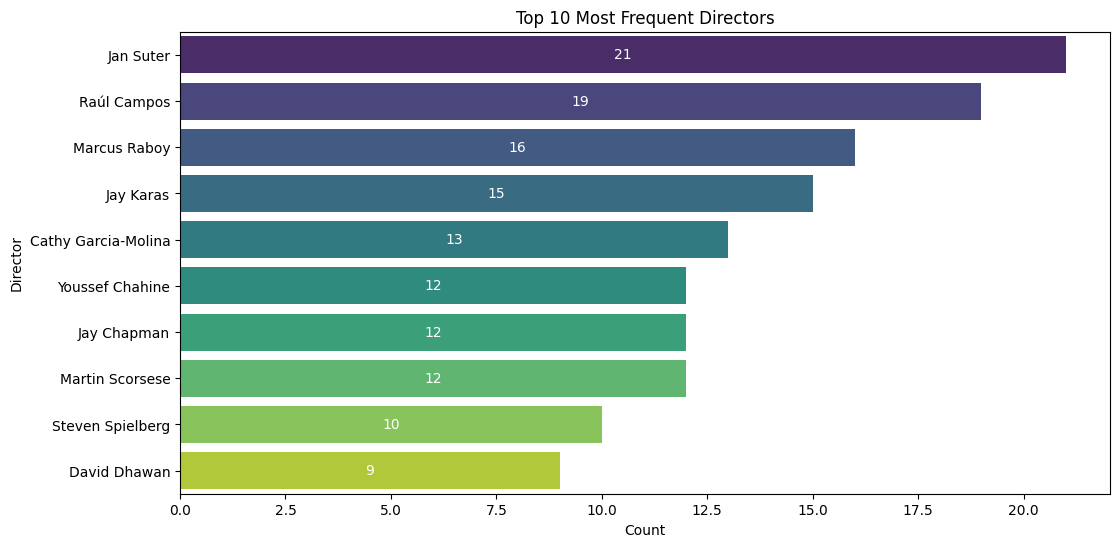

/tmp/ipython-input-941386392.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




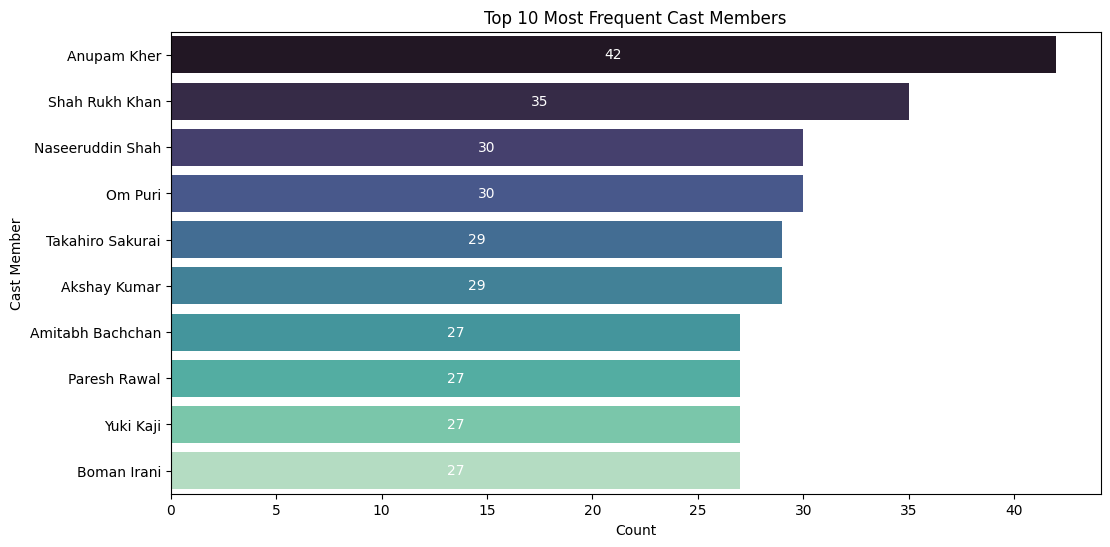

In [81]:
# Plot the top 10 most frequent directors
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=director_counts.head(10).values, y=director_counts.head(10).index, orient="h", palette="viridis")
for container in ax.containers:
    ax.bar_label(container, label_type='center', color='white')
plt.title('Top 10 Most Frequent Directors')
plt.xlabel('Count')
plt.ylabel('Director')
plt.savefig('top_directors_bar_chart.png')
plt.show()

# Plot the top 10 most frequent cast members
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=cast_counts.head(10).values, y=cast_counts.head(10).index, orient="h", palette="mako")
for container in ax.containers:
    ax.bar_label(container, label_type='center', color='white')
plt.title('Top 10 Most Frequent Cast Members')
plt.xlabel('Count')
plt.ylabel('Cast Member')
plt.savefig('top_cast_bar_chart.png')
plt.show()

Note:

*   The most frequent director in the dataset is Jan Suter, with a count of 21.
*   The most frequent cast member in the dataset is Anupam Kher, with a count of 42.
*   The top 10 most frequent directors and cast members were identified and their frequencies visualized using bar charts.


In [105]:
# Movies Average duration
movies = df[df['Category'] == 'Movie']
avg_duration = movies['Duration_min'].mean()
print(f"Average Duration of Movies: {avg_duration:.2f} minutes")


Average Duration of Movies: 99.31 minutes


In [109]:
# Count frequency of seasons
tv_shows = df[df['Category'] == 'TV Show']
season_distribution = tv_shows['Seasons'].value_counts().sort_index()
print(season_distribution)

Seasons
1     1608
2      378
3      183
4       86
5       57
6       30
7       19
8       18
9        8
10       5
11       2
12       2
13       1
15       2
16       1
Name: count, dtype: int64


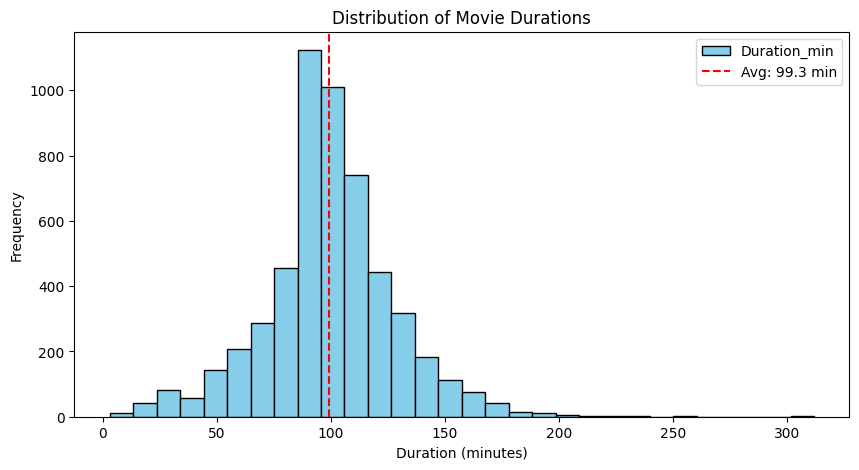

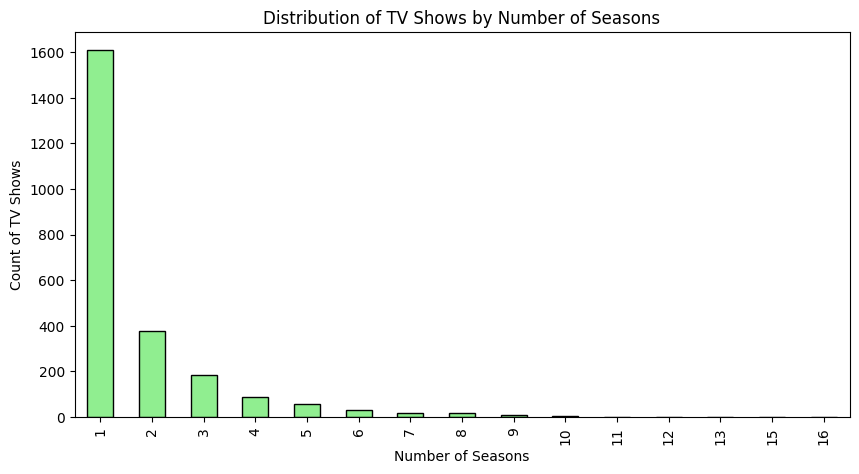

In [110]:
# Plot Movie Duration distribution
plt.figure(figsize=(10,5))
movies['Duration_min'].plot(kind='hist', bins=30, color='skyblue', edgecolor='black')
plt.axvline(avg_duration, color='red', linestyle='--', label=f'Avg: {round(avg_duration, 1)} min')
plt.title("Distribution of Movie Durations")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Plot TV Show Seasons distribution
plt.figure(figsize=(10,5))
season_distribution.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("Distribution of TV Shows by Number of Seasons")
plt.xlabel("Number of Seasons")
plt.ylabel("Count of TV Shows")
plt.show()


# Summary of Analysis

*   **Distribution of Movies vs. TV Shows:** The analysis revealed that Netflix has been increasingly focusing on movies in recent years compared to TV shows.
*   **Most Common Genres and Trends:** Dramas are the most common genre on Netflix and showed a peak in popularity in 2019. Other common genres include Comedies, Documentaries, Action & Adventure, and International TV Shows, with varying trends over the years.
*   **Country-wise Contributions:** The animated choropleth map showed the distribution of content by country over the years, highlighting the significant contribution of the United States and India to Netflix's catalog.
*   **Most Frequent Directors and Cast Members:** The most frequent director is Jan Suter (21 titles), and the most frequent cast member is Anupam Kher (42 titles). Bar charts visualized the top 10 most frequent directors and cast members.
*   **Movie Duration and TV Show Seasons:** The average duration of movies is approximately 99.31 minutes. The distribution of TV shows by the number of seasons shows that a large majority of TV shows have only 1 season.